In [35]:
import pandas as pd
from mendeleev import element
import numpy as np
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import pymatgen as mg
from pymatgen.ext.matproj import MPRester

In [36]:
with open("C:\\RPI\\MI2DMaterials\\BiLayer\\code\\file\\AAX_bilayer_data_dump.pkl", "rb") as f:
    data = pickle.load(f)
    
df  = pd.DataFrame(data)
df = df[df['state']=='JOB_FINISHED'].reset_index()


In [61]:
def get_magnetic_moment(df):
    """ parse magnetization value from magnetization raw data """
    
#     df['magmom_sites_tot'] = np.nan
    df['magmom_unitcell_x'] = np.nan
    df['magmom_unitcell_y'] = np.nan
    df['magmom_unitcell_z'] = np.nan
    
    for i in range(len(df)):
        magmom_sites_tot = np.nan
        magmom_unitcell = np.nan
        #print(type(df['data'][i]))
        if ('magnetization' in df['data'][i]):
            raw_magmom = df['data'][i]['magnetization']

            if df.name[i] == 'initial' or df.name[i] == 'spin' or df.name[i] == 'afm':
                magmom = raw_magmom[-1]
                magmom_x = magmom[2]

                if isinstance(magmom_x[0], list):
                    magmom_x_sites_tot = [x[-1] for x in magmom_x]
                else:
                    magmom_x_sites_tot = [x[-1] for x in magmom]
                    
                magmom_x_unitcell = np.sum(magmom_x_sites_tot)
                magmom_sites_tot = magmom_x_sites_tot
                
                df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
#                 df['magmom_sites_tot'][i] = magmom_sites_tot
                #print(magmom_x_sites_tot)
                print(magmom_x)
                print(magmom_x_sites_tot)
                print(magmom_x_unitcell)

                
            elif df.name[i] == 'spin_so' or df.name[i] == 'afm_so':
                magmom = raw_magmom[-3:]
                magmom_x = magmom[0][2]
                magmom_y = magmom[1][2]
                magmom_z = magmom[2][2]

                if isinstance(magmom_x[0], list):
                    magmom_x_sites_tot = [x[-1] for x in magmom_x]
                    magmom_x_unitcell = np.sum(magmom_x_sites_tot)
                else:
                    magmom_x_sites_tot = magmom_x
                    magmom_x_unitcell = magmom_x

                if isinstance(magmom_y[0], list):
                    magmom_y_sites_tot = [x[-1] for x in magmom_y]
                    magmom_y_unitcell = np.sum(magmom_y_sites_tot)
                else:
                    magmom_y_sites_tot = magmom_y
                    magmom_y_unitcell = magmom_y

                if isinstance(magmom_z[0], list):
                    magmom_z_sites_tot = [x[-1] for x in magmom_z]
                    magmom_z_unitcell = np.sum(magmom_z_sites_tot)
                else:
                    magmom_z_sites_tot = magmom_z
                    magmom_z_unitcell = magmom_z

                magmom_sites_tot = np.asarray([magmom_x_sites_tot, magmom_y_sites_tot, magmom_z_sites_tot], object)
                
                df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
                df['magmom_unitcell_y'][i] = abs(magmom_y_unitcell)
                df['magmom_unitcell_z'][i] = abs(magmom_z_unitcell)
#                 df['magmom_sites_tot'][i] = magmom_sites_tot

    return df         

In [62]:
df = get_magnetic_moment(df)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[0.013, 0.011, 1.203, 1.227], [0.012, 0.01, 1.164, 1.185], [0.013, 0.01, 1.208, 1.231], [-0.012, -0.01, -1.174, -1.196], [0.007, 

<ipython-input-61-0c951006be87>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
<ipython-input-61-0c951006be87>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
<ipython-input-61-0c951006be87>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magmom_unitcell_y'][i] = abs(magmom_y_unitcell)
<ipython-input-61-0c951006be87>:67: S

In [39]:
df

,index,_state,job_id,workflow,name,description,lock,tick,parents,input_files,...,post_error_handler,post_timeout_handler,auto_timeout_retry,state,state_history,queued_launch_id,data,magmom_unitcell_x,magmom_unitcell_y,magmom_unitcell_z
0,1,<django.db.models.base.ModelState object at 0x...,3ead76b0-ff64-4be5-9eb1-1fd14c505b88,"Ir4Cl12,ABstacking",spin,"Ir4 Cl12, AB stacking\n",,2021-01-21 09:29:35.977204+00:00,"[""f6a21599-702f-41b2-a6b2-60e6abb65dba""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:53.133719 CREATED]...,None,"{'LOOP+': [444.2358, 103.2472, 147.5554, 183.8...",0.000,NaN,NaN
1,3,<django.db.models.base.ModelState object at 0x...,547c5f8d-e843-4e79-9ffd-0649849b0bfc,"Zr2Ti2I12,ABstacking",initial,"Zr2 Ti2 I12, AB stacking\n",,2020-12-31 02:53:56.355872+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:48.287175 CREATED]...,None,"{'LOOP+': [1593.245, 326.0933, 396.8862, 308.7...",2.996,NaN,NaN
2,5,<django.db.models.base.ModelState object at 0x...,599ee41c-48ec-4b17-9e38-1cbea562adc7,"Ti4Br12,ABstacking",initial,"Ti4 Br12, AB stacking\n",,2020-12-29 23:45:34.842767+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:45.617045 CREATED]...,None,"{'LOOP+': [696.6812, 209.2252, 150.3886, 121.2...",6.553,NaN,NaN
3,7,<django.db.models.base.ModelState object at 0x...,d6eb9cfe-e30e-4590-b499-d8aec15d7c2f,"Ni2Ir2Cl12,ABstacking",initial,"Ni2 Ir2 Cl12, AB stacking\n",,2021-01-22 23:10:16.608659+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:27.846418 CREATED]...,None,"{'LOOP+': [609.0947, 129.4953, 82.5947, 64.488...",3.823,NaN,NaN
4,8,<django.db.models.base.ModelState object at 0x...,bbb4e61c-264c-4b53-b0c0-a11bb2187801,"Mo2Ir2Br12,ABstacking",afm_so,"Mo2 Ir2 Br12, AB stacking\n",,2021-01-03 05:44:20.333214+00:00,"[""4826ba20-2d28-4f01-9d16-e88ff4ec6478""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:05.901777 CREATED]...,None,"{'LOOP+': [2381.2066, 914.4853, 588.6001, 501....",0.000,0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,289,<django.db.models.base.ModelState object at 0x...,210e18bb-c057-4d36-982b-f22af240e34c,"Mo2Ir2Cl12,ABstacking",afm_so,"Mo2 Ir2 Cl12, AB stacking\n",,2021-01-23 02:02:00.462828+00:00,"[""bfdaebf3-3073-4016-a77a-5ec247dd09bb""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:10.676161 CREATED]...,None,"{'LOOP+': [1829.1186, 884.7982, 489.8681, 478....",0.001,0.002,0.001
172,292,<django.db.models.base.ModelState object at 0x...,22722e52-3e27-4cff-b16c-b11962ff103d,"Ti2Zn2Cl12,ABstacking",spin_so,"Ti2 Zn2 Cl12, AB stacking\n",,2021-01-23 02:04:49.074289+00:00,"[""7953b0ee-d672-4feb-8c78-f81ccc7680a0""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:59.955904 CREATED]...,None,"{'LOOP+': [1877.2465, 680.8125, 619.0797, 690....",0.000,0.000,0.000
173,293,<django.db.models.base.ModelState object at 0x...,0898cf11-04fb-43ba-a442-90abaa3f4354,"Fe2Ir2Br12,ABstacking",spin_so,"Fe2 Ir2 Br12, AB stacking\n",,2021-01-31 23:27:57.888398+00:00,"[""14e067d7-3018-4c4e-988f-03ebb420e8fc""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:42.927227 CREATED]...,None,"{'LOOP+': [3498.0817, 1132.3318, 594.6222, 110...",0.015,0.020,18.294
174,295,<django.db.models.base.ModelState object at 0x...,290460b6-cb18-4a71-8434-8cad0374dcae,"Cd2Ir2Cl12,ABstacking",afm_so,"Cd2 Ir2 Cl12, AB stacking\n",,2021-01-31 19:58:19.872041+00:00,"[""1789fbc8-3f2a-4ceb-8b7a-d229ae679186""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:15.453529 CREATED]...,None,"{'LOOP+': [1680.1988, 605.8187], 'NIONS': 32, ...",0.004,0.005,0.005


In [ ]:
# x - initial , spin , afm , no spin orbit coupling
# x, y, z - so 

In [58]:
df['data'][4]['magnetization'][-1][2][-1]


[-0.001, -0.012, -0.005, -0.017]

In [46]:
df['data'][0].keys()

dict_keys(['LOOP+', 'NIONS', 'NKDIM', 'NBANDS', 'energy', 'stress', 'retry_count', 'lattice_vecs', 'total charge', 'magnetization', 'position_force', 'volume of cell'])

In [47]:
df.columns

Index(['index', '_state', 'job_id', 'workflow', 'name', 'description', 'lock',
       'tick', 'parents', 'input_files', 'stage_in_url', 'stage_out_files',
       'stage_out_url', 'wall_time_minutes', 'num_nodes',
       'coschedule_num_nodes', 'ranks_per_node', 'cpu_affinity',
       'threads_per_rank', 'threads_per_core', 'node_packing_count',
       'environ_vars', 'application', 'args', 'user_workdir',
       'wait_for_parents', 'post_error_handler', 'post_timeout_handler',
       'auto_timeout_retry', 'state', 'state_history', 'queued_launch_id',
       'data', 'magmom_unitcell_x', 'magmom_unitcell_y', 'magmom_unitcell_z'],
      dtype='object')

In [48]:
df

,index,_state,job_id,workflow,name,description,lock,tick,parents,input_files,...,post_error_handler,post_timeout_handler,auto_timeout_retry,state,state_history,queued_launch_id,data,magmom_unitcell_x,magmom_unitcell_y,magmom_unitcell_z
0,1,<django.db.models.base.ModelState object at 0x...,3ead76b0-ff64-4be5-9eb1-1fd14c505b88,"Ir4Cl12,ABstacking",spin,"Ir4 Cl12, AB stacking\n",,2021-01-21 09:29:35.977204+00:00,"[""f6a21599-702f-41b2-a6b2-60e6abb65dba""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:53.133719 CREATED]...,None,"{'LOOP+': [444.2358, 103.2472, 147.5554, 183.8...",0.000,NaN,NaN
1,3,<django.db.models.base.ModelState object at 0x...,547c5f8d-e843-4e79-9ffd-0649849b0bfc,"Zr2Ti2I12,ABstacking",initial,"Zr2 Ti2 I12, AB stacking\n",,2020-12-31 02:53:56.355872+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:48.287175 CREATED]...,None,"{'LOOP+': [1593.245, 326.0933, 396.8862, 308.7...",2.996,NaN,NaN
2,5,<django.db.models.base.ModelState object at 0x...,599ee41c-48ec-4b17-9e38-1cbea562adc7,"Ti4Br12,ABstacking",initial,"Ti4 Br12, AB stacking\n",,2020-12-29 23:45:34.842767+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:45.617045 CREATED]...,None,"{'LOOP+': [696.6812, 209.2252, 150.3886, 121.2...",6.553,NaN,NaN
3,7,<django.db.models.base.ModelState object at 0x...,d6eb9cfe-e30e-4590-b499-d8aec15d7c2f,"Ni2Ir2Cl12,ABstacking",initial,"Ni2 Ir2 Cl12, AB stacking\n",,2021-01-22 23:10:16.608659+00:00,[],*,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:27.846418 CREATED]...,None,"{'LOOP+': [609.0947, 129.4953, 82.5947, 64.488...",3.823,NaN,NaN
4,8,<django.db.models.base.ModelState object at 0x...,bbb4e61c-264c-4b53-b0c0-a11bb2187801,"Mo2Ir2Br12,ABstacking",afm_so,"Mo2 Ir2 Br12, AB stacking\n",,2021-01-03 05:44:20.333214+00:00,"[""4826ba20-2d28-4f01-9d16-e88ff4ec6478""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:05.901777 CREATED]...,None,"{'LOOP+': [2381.2066, 914.4853, 588.6001, 501....",0.000,0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,289,<django.db.models.base.ModelState object at 0x...,210e18bb-c057-4d36-982b-f22af240e34c,"Mo2Ir2Cl12,ABstacking",afm_so,"Mo2 Ir2 Cl12, AB stacking\n",,2021-01-23 02:02:00.462828+00:00,"[""bfdaebf3-3073-4016-a77a-5ec247dd09bb""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:10.676161 CREATED]...,None,"{'LOOP+': [1829.1186, 884.7982, 489.8681, 478....",0.001,0.002,0.001
172,292,<django.db.models.base.ModelState object at 0x...,22722e52-3e27-4cff-b16c-b11962ff103d,"Ti2Zn2Cl12,ABstacking",spin_so,"Ti2 Zn2 Cl12, AB stacking\n",,2021-01-23 02:04:49.074289+00:00,"[""7953b0ee-d672-4feb-8c78-f81ccc7680a0""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:59.955904 CREATED]...,None,"{'LOOP+': [1877.2465, 680.8125, 619.0797, 690....",0.000,0.000,0.000
173,293,<django.db.models.base.ModelState object at 0x...,0898cf11-04fb-43ba-a442-90abaa3f4354,"Fe2Ir2Br12,ABstacking",spin_so,"Fe2 Ir2 Br12, AB stacking\n",,2021-01-31 23:27:57.888398+00:00,"[""14e067d7-3018-4c4e-988f-03ebb420e8fc""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:44:42.927227 CREATED]...,None,"{'LOOP+': [3498.0817, 1132.3318, 594.6222, 110...",0.015,0.020,18.294
174,295,<django.db.models.base.ModelState object at 0x...,290460b6-cb18-4a71-8434-8cad0374dcae,"Cd2Ir2Cl12,ABstacking",afm_so,"Cd2 Ir2 Cl12, AB stacking\n",,2021-01-31 19:58:19.872041+00:00,"[""1789fbc8-3f2a-4ceb-8b7a-d229ae679186""]",POTCAR,...,True,True,False,JOB_FINISHED,\n[12-28-2020 21:45:15.453529 CREATED]...,None,"{'LOOP+': [1680.1988, 605.8187], 'NIONS': 32, ...",0.004,0.005,0.005


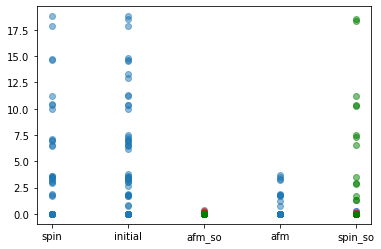

In [51]:
plt.scatter(df.name, df.magmom_unitcell_x, alpha =0.5)
plt.scatter(df.name, df.magmom_unitcell_y, color='r',alpha =0.5)
plt.scatter(df.name, df.magmom_unitcell_z, color = 'g', alpha = 0.5)

In [65]:

total_moment_sum = np.square(5) + np.square(3) + np.square(1) 
print(total_moment_sum)
total_moment_temp = np. sqrt(total_moment_sum)
print(total_moment_temp)


35
5.916079783099616
